In [ ]:
#The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, 
#with 6000 images per class. There are 50000 training images and 10000 test images.
import tensorflow as tf

from tensorflow import keras
import pandas
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras.datasets import cifar10
from keras.utils import np_utils

In [ ]:
 (x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
import numpy as np

label = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
data_augmentation = tf.keras.Sequential(
    [
     keras.layers.experimental.preprocessing.RandomRotation(factor=0.2),
     keras.layers.experimental.preprocessing.RandomContrast(factor=0.3),
     keras.layers.experimental.preprocessing.RandomFlip()
    ]
)

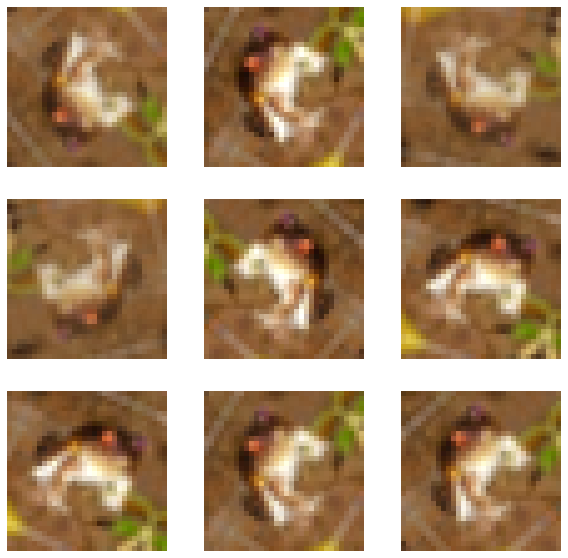

In [ ]:
plt.figure(figsize=(10, 10))
image = tf.expand_dims(x_train[0], 0)
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:

x_train = x_train.astype('float32')/255
x_test =x_test.astype('float32')/255

y_train = np_utils.to_categorical(y_train,len(label))
y_test = np_utils.to_categorical(y_test,len(label))

In [ ]:
print(len(x_train))

50000


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test))

In [ ]:
train_dataset.element_spec

(TensorSpec(shape=(32, 32, 3), dtype=tf.float64, name=None),
 TensorSpec(shape=(1,), dtype=tf.uint8, name=None))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
def prepare(ds,shuffle=False,batch_size = 128,agument = False):
  
  #shuffle the dataset
  if shuffle:
    ds = ds.shuffle(10000)

  #Batch all the datsets
  ds = ds.batch(batch_size)

  #use agumentation
  if agument:
    ds = ds.map(lambda x ,Y :(data_augmentation(x,training=True),Y),num_parallel_calls=AUTOTUNE)

  return ds.prefetch(buffer_size = AUTOTUNE)




In [ ]:
train_ds = prepare(train_dataset,shuffle=True,agument=True)
val_ds = prepare(validation_dataset)

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))

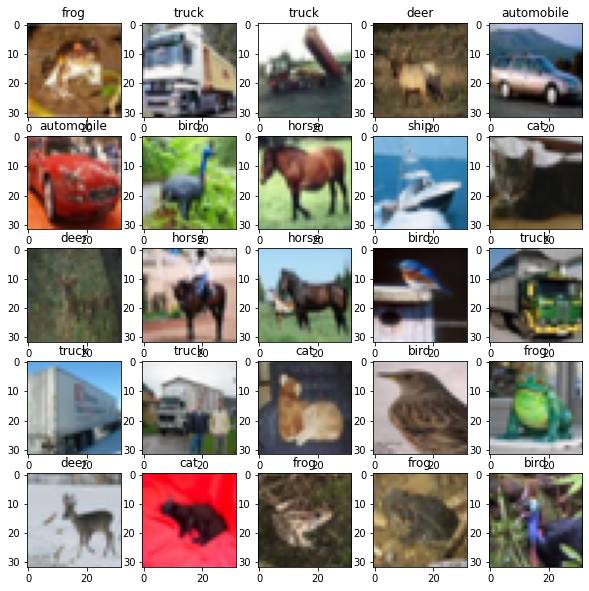

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(25):
  ax = fig.add_subplot(5,5,i+1)
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  ax.set_title(label[y_train[i][0]])

plt.show()

In [ ]:
n_labels = 10

In [ ]:
input_shape =(32,32,32,3)
model =tf.keras.models.Sequential()

model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(96,(5,5),activation="relu"))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(128,(3,3),padding='same',activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Conv2D(192,(3,3),padding="same",activation="relu"))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Conv2D(192,(3,3),padding="same",activation="relu"))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dropout(rate=0.7))
model.add(keras.layers.Dense(1024,activation="relu"))
model.add(keras.layers.Dropout(rate=0.7))
model.add(keras.layers.Dense(n_labels,activation="softmax"))
model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 11, 96)        153696    
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 5, 96)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 5, 5, 128)         110720    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 2, 2, 128)       

with batch-size of 128 and epoch =30, the accuracy is 85% and validation accuracy is 71%

with batch-size of 128 and epoch= 40, the accuracy is 85% and validation acccuracy is 70%

with the batch-size of 256 and epoch 40 , the accuracy is 88% and validation accuracy is still 70%

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
# history = model.fit(train_ds,epochs=60,validation_data=val_ds)
history = model.fit(x_train,y_train,batch_size=128,epochs=200,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/200
391/391 [==============================] - 5s 11ms/step - loss: 2.1371 - accuracy: 0.1546 - val_loss: 1.9071 - val_accuracy: 0.2056
Epoch 2/200
391/391 [==============================] - 4s 10ms/step - loss: 1.8432 - accuracy: 0.2384 - val_loss: 1.6140 - val_accuracy: 0.3636
Epoch 3/200
391/391 [==============================] - 4s 10ms/step - loss: 1.6095 - accuracy: 0.3704 - val_loss: 1.4245 - val_accuracy: 0.4570
Epoch 4/200
391/391 [==============================] - 4s 11ms/step - loss: 1.4486 - accuracy: 0.4571 - val_loss: 1.3064 - val_accuracy: 0.5209
Epoch 5/200
391/391 [==============================] - 4s 10ms/step - loss: 1.3337 - accuracy: 0.5132 - val_loss: 1.2267 - val_accuracy: 0.5604
Epoch 6/200
391/391 [==============================] - 4s 10ms/step - loss: 1.2442 - accuracy: 0.5564 - val_loss: 1.1236 - val_accuracy: 0.5902
Epoch 7/200
391/391 [==============================] - 4s 10ms/step - loss: 1.1618 - accuracy: 0.5919 - val_loss: 1.1088 - val_accuracy:

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


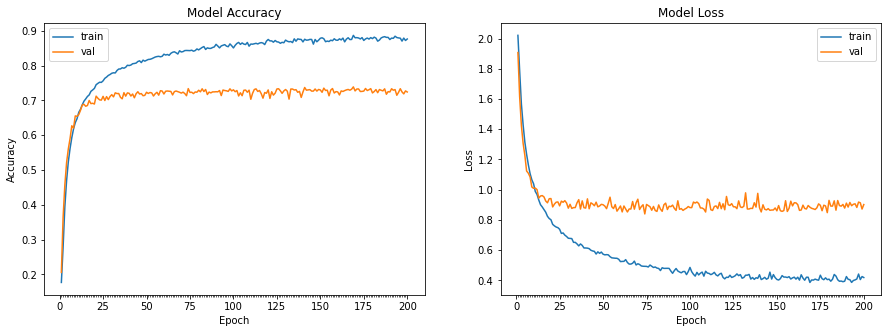

In [ ]:
plot_model_history(history)

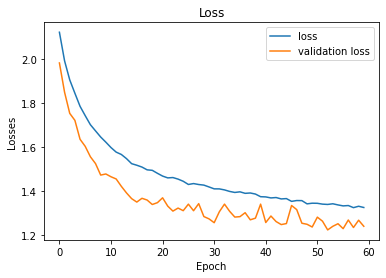

In [ ]:
plt.title("Loss")
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(loc='upper right')
plt.show()

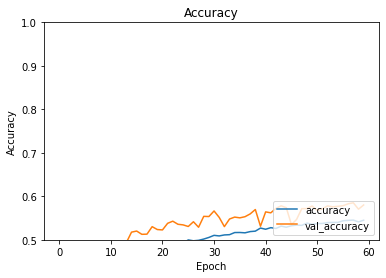

In [ ]:
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')